In [381]:
import pandas as pd
from google.colab import drive
import numpy as np

In [382]:
 drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [383]:

data  = pd.read_csv('drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')

In [384]:
data.shape

(7043, 21)

In [385]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [386]:
columns = data.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [387]:
for i in columns:
  print(data[i].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [389]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [390]:
data['SeniorCitizen'] =data['SeniorCitizen'].astype(object)

In [391]:
data['SeniorCitizen'] =data['SeniorCitizen'].replace(0,"No")
data['SeniorCitizen'] =data['SeniorCitizen'].replace(1,"Yes")


In [392]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [393]:
data.isnull().sum()
#Therefore the dataset has no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [394]:
#continue eda

In [395]:
charges = data[['MonthlyCharges','TotalCharges','tenure']]
data.drop(['MonthlyCharges','TotalCharges','tenure'], axis = 1, inplace = True)

In [396]:
charges['TotalCharges'] = pd.to_numeric(charges['TotalCharges'], errors = 'coerce').astype(float)


<ipython-input-396-80d9b0f9eeba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charges['TotalCharges'] = pd.to_numeric(charges['TotalCharges'], errors = 'coerce').astype(float)


In [397]:
charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7043 non-null   float64
 1   TotalCharges    7032 non-null   float64
 2   tenure          7043 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


In [398]:
charges = charges.fillna(method='ffill') #to possibly mitigate the bias

In [399]:
charges.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7043 non-null   float64
 1   TotalCharges    7043 non-null   float64
 2   tenure          7043 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


In [400]:
data = pd.concat([data,charges], axis =1)
data


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
0,7590-VHVEG,Female,No,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,No,29.85,29.85,1
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,No,56.95,1889.50,34
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,Yes,53.85,108.15,2
3,7795-CFOCW,Male,No,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),No,42.30,1840.75,45
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,Yes,70.70,151.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,No,84.80,1990.50,24
7039,2234-XADUH,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),No,103.20,7362.90,72
7040,4801-JZAZL,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,No,29.60,346.45,11
7041,8361-LTMKD,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,Yes,74.40,306.60,4


In [401]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000
unique,7043,2,2,2,2,2,3,3,3,3,...,3,3,3,3,2,4,2,NaN,NaN,NaN
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,No,NaN,NaN,NaN
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,...,3473,2810,2785,3875,4171,2365,5174,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2285.169963,32.371149
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2267.544511,24.559481
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.675000,9.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1398.250000,29.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3803.050000,55.000000


In [402]:
useless_feature = ['customerID']
data.drop(useless_feature, axis = 1, inplace = True )
data


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,29.85,29.85,1
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,56.95,1889.50,34
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,53.85,108.15,2
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,42.30,1840.75,45
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,70.70,151.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,84.80,1990.50,24
7039,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,103.20,7362.90,72
7040,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,29.60,346.45,11
7041,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,74.40,306.60,4


In [403]:
import matplotlib.pyplot as plt

In [404]:
ccols= data.select_dtypes(include=['object']).columns
ncols = data.select_dtypes(include=np.number).columns.tolist()
ccols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [405]:
ncols

['MonthlyCharges', 'TotalCharges', 'tenure']

In [406]:
import seaborn as sns

In [407]:
charges = data[['MonthlyCharges','TotalCharges','tenure']]
data.drop(['MonthlyCharges','TotalCharges','tenure'], axis = 1, inplace = True)
charges


,MonthlyCharges,TotalCharges,tenure
0,29.85,29.85,1
1,56.95,1889.50,34
2,53.85,108.15,2
3,42.30,1840.75,45
4,70.70,151.65,2
...,...,...,...
7038,84.80,1990.50,24
7039,103.20,7362.90,72
7040,29.60,346.45,11
7041,74.40,306.60,4


In [408]:
data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


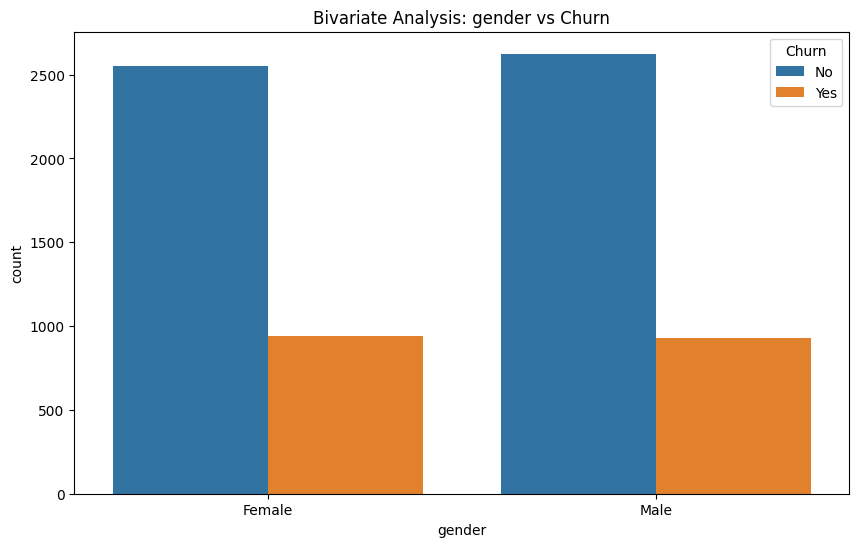

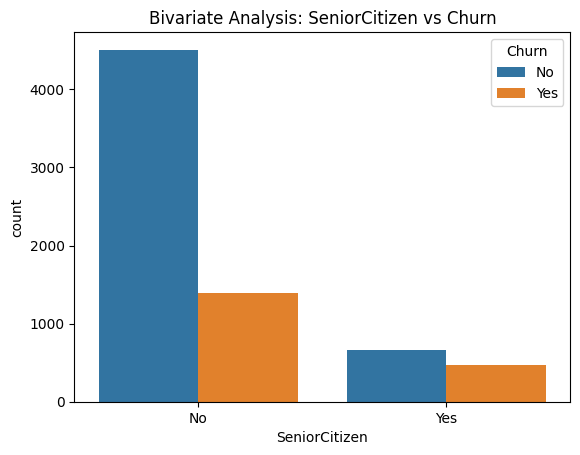

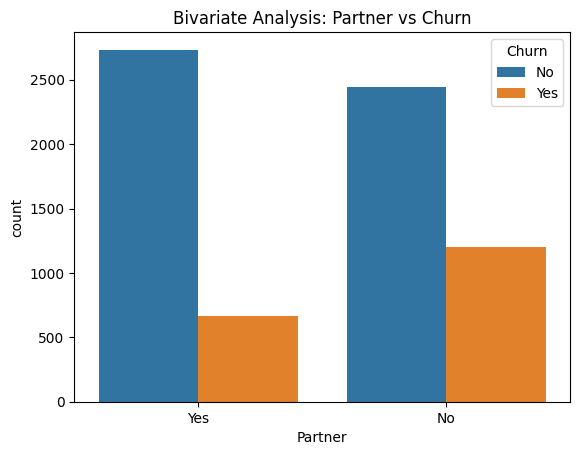

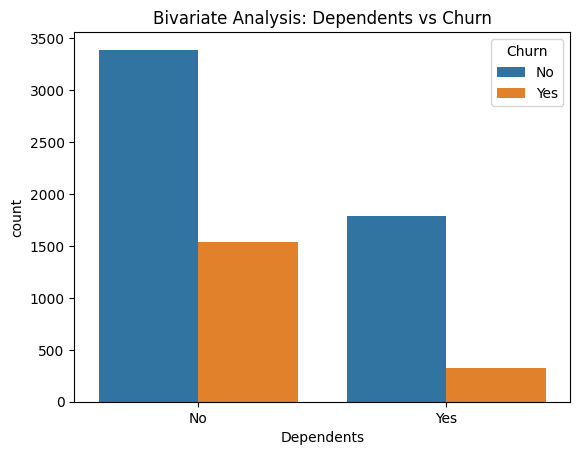

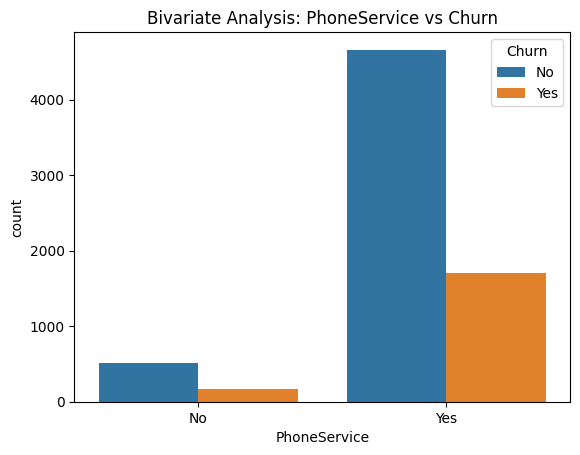

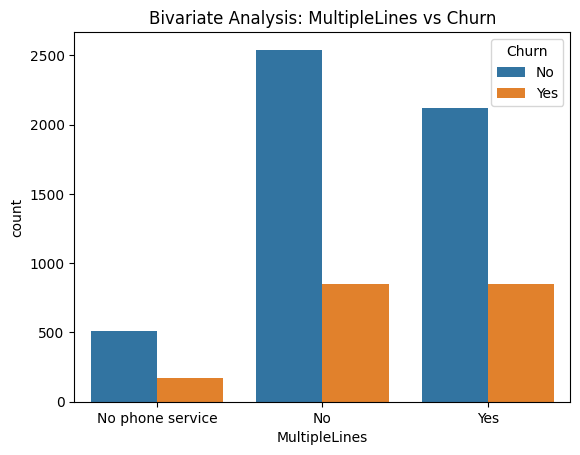

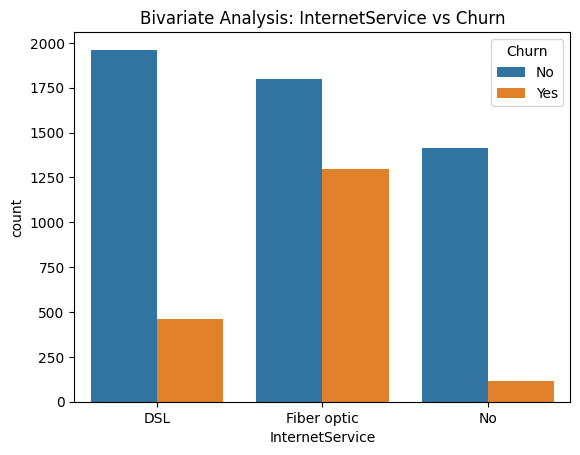

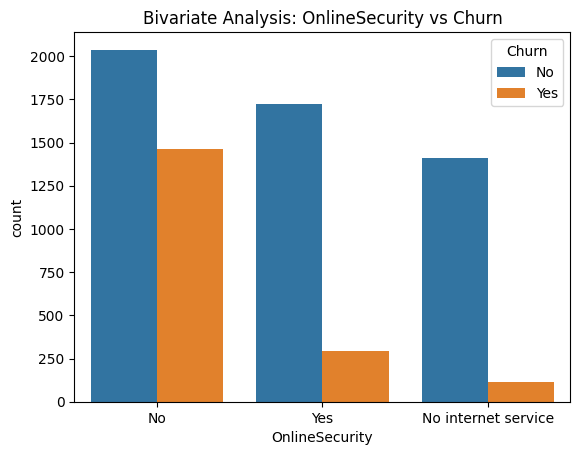

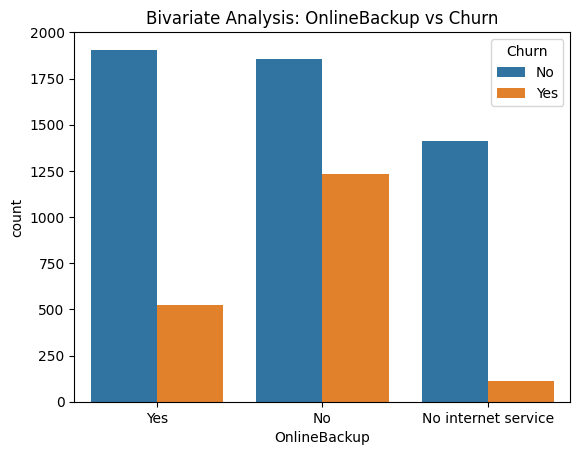

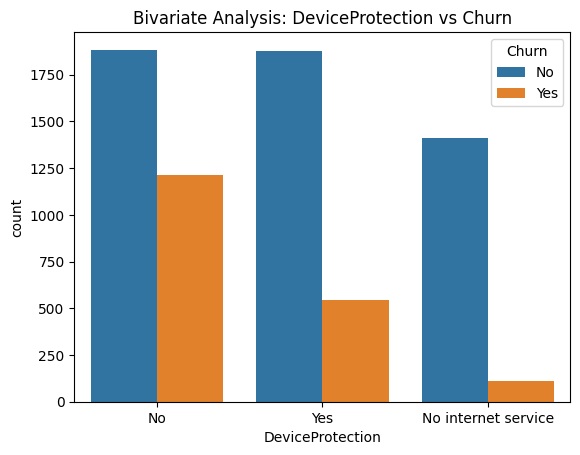

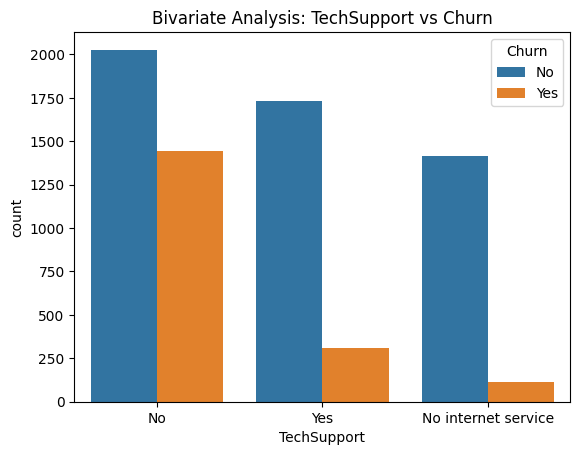

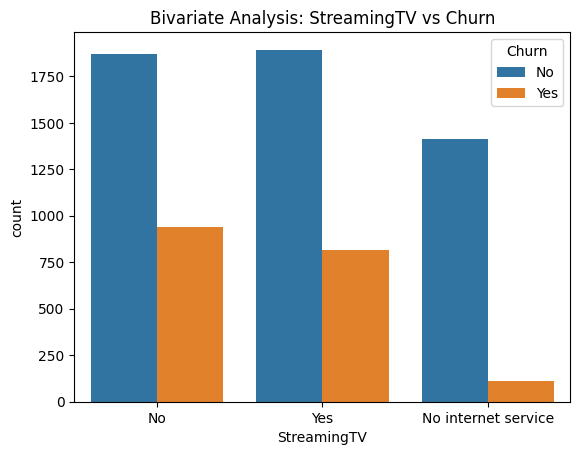

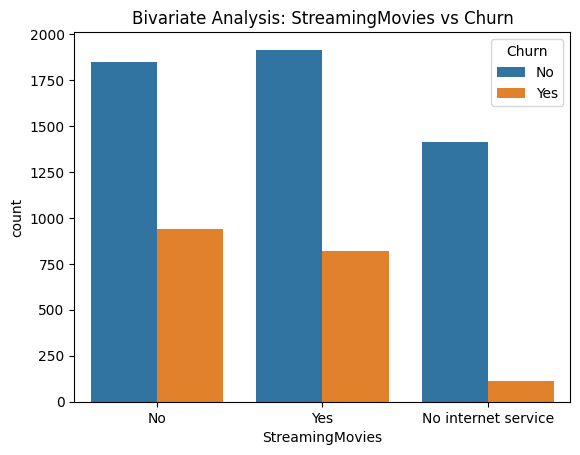

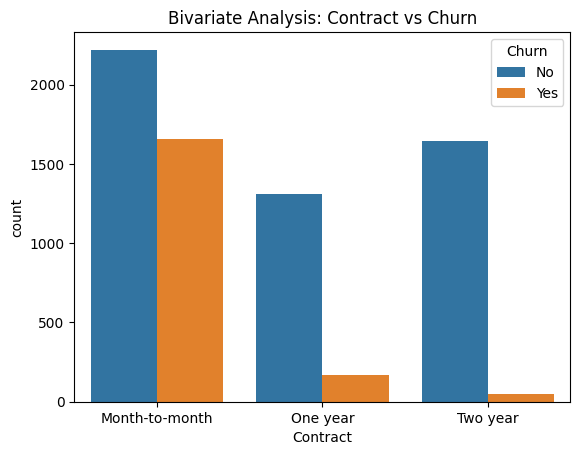

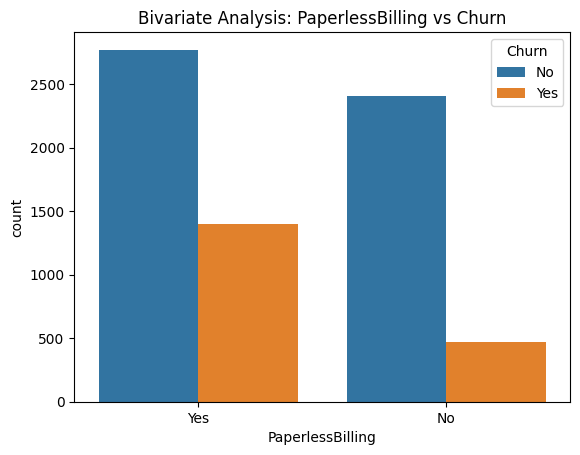

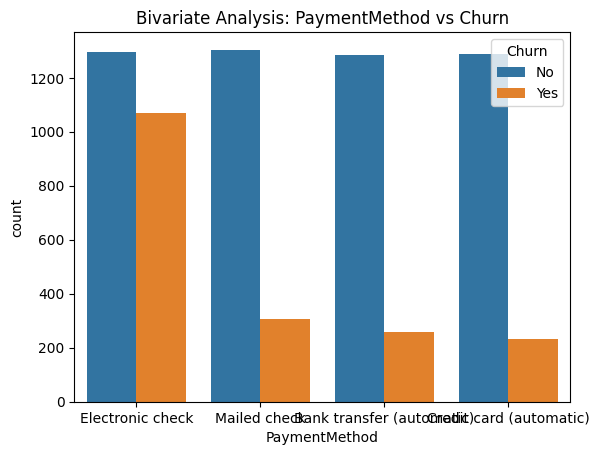

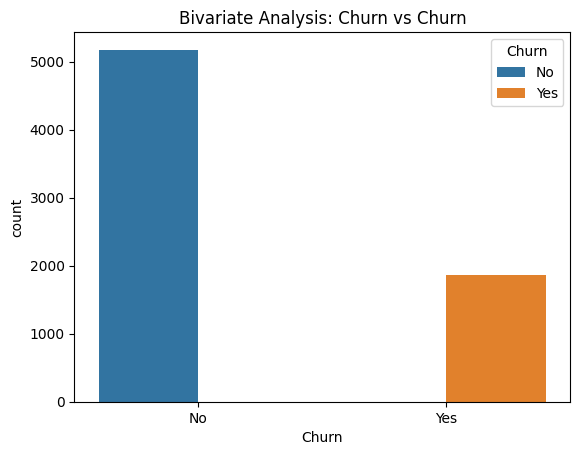

In [409]:
plt.figure(figsize=(10, 6))

for i in ccols:
  sns.countplot(x=i, hue='Churn', data=data)
  plt.title(f'Bivariate Analysis: {i} vs Churn')
  plt.show()

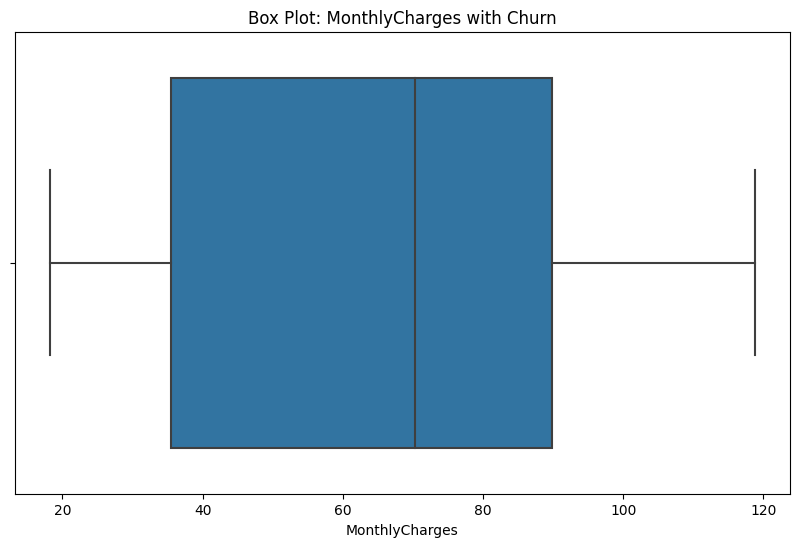

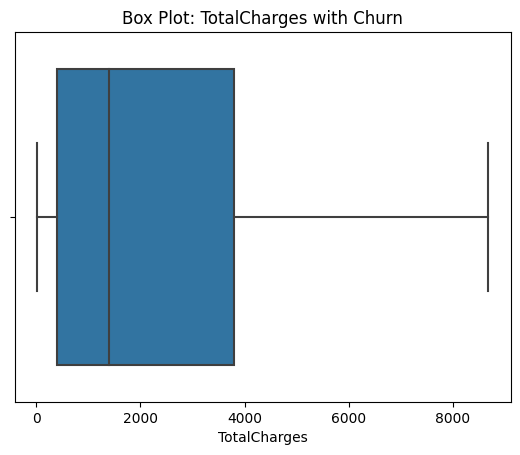

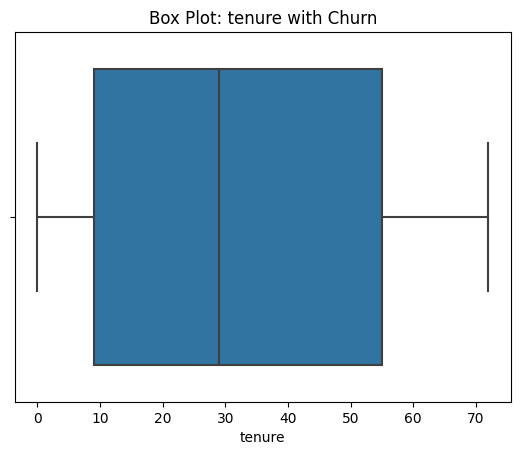

In [410]:
plt.figure(figsize=(10, 6))

for i in ncols:
  sns.boxplot(x = charges[i], hue = data['Churn'])
  plt.title(f'Box Plot: {i} with Churn')
  plt.show()

In [411]:

from sklearn.preprocessing import LabelEncoder



In [412]:
  encoder = LabelEncoder()

In [413]:
data = data.apply(encoder.fit_transform)
data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [414]:
import pickle

In [415]:
#save label encoder #
with open('c_encoder.pkl','wb') as e:
  pickle.dump(encoder, e)

In [416]:
from sklearn.preprocessing import StandardScaler

In [417]:
scaler = StandardScaler()

In [418]:
charges

,MonthlyCharges,TotalCharges,tenure
0,29.85,29.85,1
1,56.95,1889.50,34
2,53.85,108.15,2
3,42.30,1840.75,45
4,70.70,151.65,2
...,...,...,...
7038,84.80,1990.50,24
7039,103.20,7362.90,72
7040,29.60,346.45,11
7041,74.40,306.60,4


In [ ]:
sc_charges =scaler.fit_transform(charges)

In [ ]:
#save scaler

with open('n_scaler.pkl','wb') as s:
  pickle.dump(scaler, s)

In [ ]:
charges = pd.DataFrame(sc_charges, columns = charges.columns)
charges

,MonthlyCharges,TotalCharges,tenure
0,-1.160323,-0.994680,-1.277445
1,-0.259629,-0.174505,0.066327
2,-0.362660,-0.960146,-1.236724
3,-0.746535,-0.196006,0.514251
4,0.197365,-0.940961,-1.236724
...,...,...,...
7038,0.665992,-0.129960,-0.340876
7039,1.277533,2.239467,1.613701
7040,-1.168632,-0.855047,-0.870241
7041,0.320338,-0.872623,-1.155283


In [ ]:
data.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
Contract           -0.396713
Name: Churn, dtype: float64

In [ ]:
Y = data['Churn']
data = pd.concat([data,charges], axis = 1)


In [ ]:
X = data.drop(['Churn'], axis = 1)
X


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994680,-1.277445
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.174505,0.066327
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960146,-1.236724
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.196006,0.514251
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940961,-1.236724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.129960,-0.340876
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.239467,1.613701
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.855047,-0.870241
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.872623,-1.155283


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
rf=RandomForestClassifier(n_estimators=100, n_jobs=1, random_state = 42)

In [ ]:
rf.fit(Xtrain, Ytrain)

RandomForestClassifier(n_jobs=1, random_state=42)

In [ ]:
important_features = rf.feature_importances_
best_ten_features= X.columns[np.argsort(important_features)[::-1]][:10]
best_ten_features

Index(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
       'OnlineSecurity', 'PaymentMethod', 'TechSupport', 'gender',
       'InternetService', 'OnlineBackup'],
      dtype='object')

In [ ]:
X = X[best_ten_features]

In [380]:
X

,TotalCharges,MonthlyCharges,tenure,Contract,OnlineSecurity,PaymentMethod,TechSupport,gender,InternetService,OnlineBackup
0,-0.994680,-1.160323,-1.277445,0,0,2,0,0,0,2
1,-0.174505,-0.259629,0.066327,1,2,3,0,1,0,0
2,-0.960146,-0.362660,-1.236724,0,2,3,0,1,0,2
3,-0.196006,-0.746535,0.514251,1,2,0,2,1,0,0
4,-0.940961,0.197365,-1.236724,0,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7038,-0.129960,0.665992,-0.340876,1,2,3,2,1,0,0
7039,2.239467,1.277533,1.613701,1,0,1,0,0,1,2
7040,-0.855047,-1.168632,-0.870241,0,2,2,0,0,0,0
7041,-0.872623,0.320338,-1.155283,0,0,3,0,1,1,0


In [ ]:
#take the top 10 that have a high feature important_features

In [ ]:
Xtrain, Xdelta, Ytrain, Ydelta = train_test_split(X,Y,test_size=0.3, random_state=102)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import to_categorical

In [ ]:
Xeval, Xtest, Yeval, Ytest = train_test_split(Xdelta,Ydelta,test_size=0.1, random_state=113)


In [ ]:
from tensorflow.keras.layers import Dropout
in_layer = Input(shape=(Xtrain.shape[1],))



h_layer_1 = Dense(39, activation='relu')(in_layer)

drop_out = Dropout(0.2)(h_layer_1)

h_layer_2 = Dense(25, activation='relu')(drop_out)
drop_out = Dropout(0.4)(h_layer_2)
h_layer_3 = Dense(16, activation='relu')(drop_out)
out_layer = Dense(1, activation='sigmoid')(h_layer_3)

model = Model(inputs=in_layer, outputs=out_layer)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_12 (Dense)            (None, 39)                429       
                                                                 
 dropout_6 (Dropout)         (None, 39)                0         
                                                                 
 dense_13 (Dense)            (None, 25)                1000      
                                                                 
 dropout_7 (Dropout)         (None, 25)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                416       
                                                                 
 dense_15 (Dense)            (None, 1)                 17  

In [ ]:
model.fit(Xtrain, Ytrain, epochs =70, validation_data=(Xdelta, Ydelta))

Epoch 1/70
155/155 [==============================] - 2s 6ms/step - loss: 0.5589 - accuracy: 0.7022 - val_loss: 0.4378 - val_accuracy: 0.7974
Epoch 2/70
155/155 [==============================] - 1s 4ms/step - loss: 0.4656 - accuracy: 0.7744 - val_loss: 0.4258 - val_accuracy: 0.7979
Epoch 3/70
155/155 [==============================] - 1s 6ms/step - loss: 0.4533 - accuracy: 0.7759 - val_loss: 0.4255 - val_accuracy: 0.7993
Epoch 4/70
155/155 [==============================] - 1s 5ms/step - loss: 0.4494 - accuracy: 0.7748 - val_loss: 0.4222 - val_accuracy: 0.7984
Epoch 5/70
155/155 [==============================] - 1s 5ms/step - loss: 0.4482 - accuracy: 0.7832 - val_loss: 0.4209 - val_accuracy: 0.7989
Epoch 6/70
155/155 [==============================] - 1s 4ms/step - loss: 0.4437 - accuracy: 0.7852 - val_loss: 0.4226 - val_accuracy: 0.7979
Epoch 7/70
155/155 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7868 - val_loss: 0.4229 - val_accuracy: 0.7956
Epoch 

In [ ]:
_, accuracy = model.evaluate(Xtrain, Ytrain)
print(accuracy*100)

155/155 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8055
80.54766654968262


In [ ]:
loss, accuracy = model.evaluate(Xdelta, Ydelta)
print(f'test accuracy: {accuracy*100:.5f}')
print(f'test loss: {loss:.5f}')

67/67 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8064
test accuracy: 80.64364
test loss: 0.41601


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
def create_model(optimizer = "adam",epochs= 20):
  # create intput layer
  inputs =Input(shape=(X.shape[1],))
  input = Dense(64, activation="relu")(inputs)
  dropout= Dropout(0.4)(input)
  hidden=Dense(64, activation="relu")(dropout)
  dropout= Dropout(0.4)(hidden)
  hidden=Dense(64, activation="relu")(dropout)


  outputs = Dense(1, activation='sigmoid')(hidden)

# Create model
  model = Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=optimizer, metrics=['accuracy'], loss='binary_crossentropy')
  return model


In [ ]:

# To make compatable with sklearn
model = KerasClassifier(model=create_model)


In [ ]:
hyperparam_values = {
    'optimizer': ['sgd','adam'], # add more paramters
    'epochs' : [20,30,40,50],
    'batch_size' : [20,30,40,60]
}

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #make better and more random

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=hyperparam_values, scoring='accuracy', cv=cv)
gr_result = grid.fit(Xeval, Yeval, validation_data=(Xtest, Ytest))

Streaming output truncated to the last 5000 lines.
Epoch 20/30
38/38 [==============================] - 0s 8ms/step - loss: 0.4289 - accuracy: 0.7921 - val_loss: 0.3897 - val_accuracy: 0.8113
Epoch 21/30
38/38 [==============================] - 0s 12ms/step - loss: 0.4343 - accuracy: 0.7941 - val_loss: 0.3810 - val_accuracy: 0.8019
Epoch 22/30
38/38 [==============================] - 1s 13ms/step - loss: 0.4426 - accuracy: 0.7849 - val_loss: 0.3898 - val_accuracy: 0.8066
Epoch 23/30
38/38 [==============================] - 0s 7ms/step - loss: 0.4302 - accuracy: 0.8013 - val_loss: 0.3875 - val_accuracy: 0.8113
Epoch 24/30
38/38 [==============================] - 0s 8ms/step - loss: 0.4423 - accuracy: 0.7862 - val_loss: 0.3878 - val_accuracy: 0.8113
Epoch 25/30
38/38 [==============================] - 0s 7ms/step - loss: 0.4369 - accuracy: 0.7974 - val_loss: 0.3911 - val_accuracy: 0.8066
Epoch 26/30
38/38 [==============================] - 0s 8ms/step - loss: 0.4290 - accuracy: 0.7928 - 

In [ ]:
grbest_score = gr_result.best_score_
grbest_score

0.8021978173780908

In [ ]:
grbest_param = gr_result.best_params_
grbest_param

{'batch_size': 40, 'epochs': 40, 'optimizer': 'adam'}

In [ ]:
from sklearn import metrics

In [ ]:
gr_ypred = grid.predict(Xtest)

6/6 [==============================] - 0s 6ms/step


In [ ]:
gr_auc = metrics.roc_auc_score(Ytest, gr_ypred)
gr_auc

0.7149035262807718

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
c_report = classification_report(Ytest, gr_ypred)

In [ ]:
print(f"classification Report:\n {c_report}")

classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       167
           1       0.54      0.56      0.55        45

    accuracy                           0.81       212
   macro avg       0.71      0.71      0.71       212
weighted avg       0.81      0.81      0.81       212



In [ ]:
c_matrix = confusion_matrix(Ytest, gr_ypred)
c_matrix

array([[146,  21],
       [ 20,  25]])

In [ ]:
#save model

In [378]:
grid.best_estimator_.model("adam",40).save('best_model.h5')

Comment code,
,Create streamlit app
,Optimize model
,Video
,Test
,Deploy
cofusion report
confidence level
readme file
save model,scalar, encoder
write something under the EDA




